# Notebook activity B1.1 Using R to implement hierarchical clustering

In this notebook activity, you will learn how to do agglomerative hierarchical clustering using R. As an example, we will consider the data on the car park occupancy dataset that was introduced in Subsection 1.1 of Unit B1.

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the parking data frame
data(parking)
# Check the data frame has loaded OK
head(parking)

### (ii)

In the empty code cell below, write code to obtain a histogram of the variable `occupancy`.

#### Solution <a class="tocSkip">

The code cell below produces the required histogram.

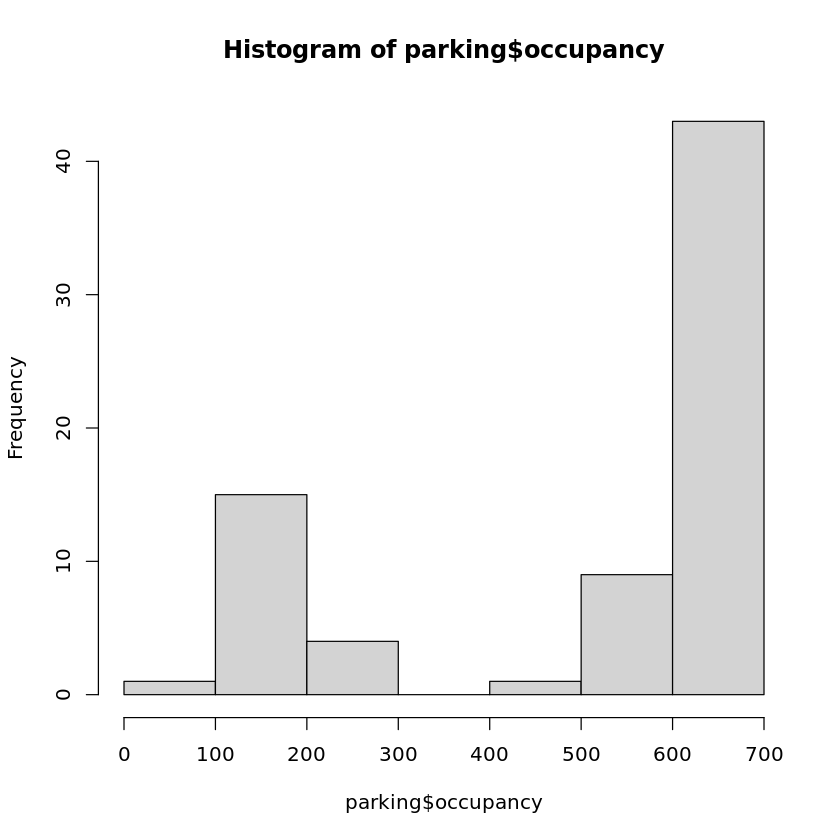

In [2]:
hist(parking$occupancy)

### (iii)

Compare this histogram with that given in Figure 2 (Subsection 1.1, Unit B1).

#### Solution <a class="tocSkip">

The two histograms look similar. In particular, the data appears to split into two groups. One group where there were less than 300 cars in the car park and the other when there were more than 400 cars in the car park. The main difference between the two histograms is that there are 6 bars in this histogram but 9 bars in the histogram in Figure 2 (Subsection 1.1, Unit B1).

## (b) Using the function `hclust()` 

In R, there is a function `hclust()` that carries out agglomerative hierarchcial clustering. By default it uses complete linkage to calculate the dissimilarity between two clusters. The selection of the dissimilarity measure to use is not left as an option to specify in the function. Instead, it takes as an input the dissimilarities between all the observations rather than the raw data. So, the first step is to get R to calculate these dissimilarities. This can be done using the following function:
```
dist(dataFrame)
```
or, for a single variable,
```
dist(variable)
```

Although the function `dist()` can use a number of different dissimilarity functions, Euclidean distance is used by default.

### (i)

In the cell code below use the `dist()` function to calculate the dissimilarities for the just the occupancy variable in the car parking data, using Euclidean distance.

Save the resulting dissimilarities in an object called `occupancyDiss`.

#### Solution <a class="tocSkip">

Running the code below will store the result in `occupancyDiss`. No output is produced.

In [3]:
occupancyDiss <- dist(parking$occupancy)

### (ii)

Having got the dissimilarities, we are now ready to get R to do the clustering. So, run the following command to get it to do so. What do you notice?

In [ ]:
hclust(occupancyDiss)

#### Solution <a class="tocSkip">

You should have noticed that the output given by R does not automatically return any results. Instead, it just shows which linkage was used, which dissimilarity measure and how many observations there are. To make progress, we need to ask R to do more with the output from `hclust()`.  

## (c) Doing more with `hclust()`

### (i)

Use the cell code below to store the results of the clustering in an object called `occupancyClus`. 

Ask R to produce a plot of the results by just using the following command.

`plot(occupancyClus)`

#### Solution <a class="tocSkip">

Running the code below produces the required plot.

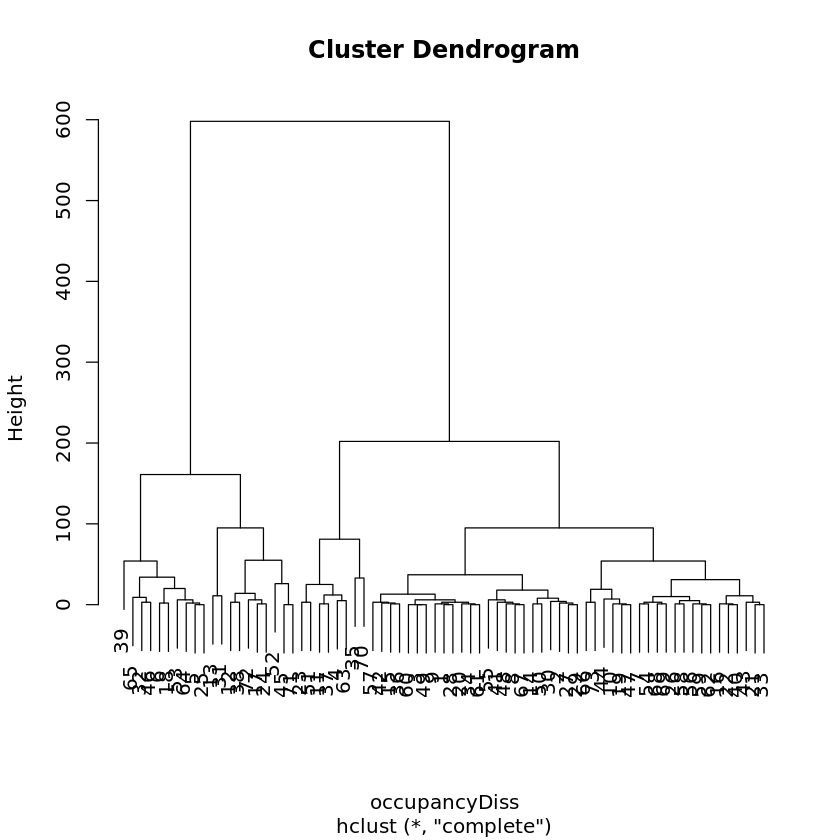

In [5]:
occupancyClus <- hclust(occupancyDiss)
plot(occupancyClus)

### (ii)

What type of plot has R automatically produced?

#### Solution <a class="tocSkip">

The default plot produced by R is a dendrogram. 

The labelling of the dendrogram is different to that used in Unit B1. However, many of the options you use to customize other plots (such as scatterplots) also work with this `plot()` command. For example, adding `ylab = "Dissimilarity"` to the `plot()`  call changes the labelling of the vertical axis to 'Dissimilarity' from 'Height'.  

---

###  <a class="tocSkip">

As you saw in Activity 15 (Subsection 3.3, Unit B1), the dendrogram can be used to allocate observations to clusters, for any given number of clusters. In R, this is done by creating a vector of the same length as the number of observations. (So in this case a vector of length 73.) Then the value in the $i$th position denotes which cluster the $i$th observation is allocated to. 

This vector is obtained from the dendrogram by applying the following function 
```
cutree(clusterResults, k)
``` 
where `clusterResults` is an object resulting from some hierarchical clustering, and $k$ is the number of clusters that are required. 

## (d) Using the `cutree()` function to obtain cluster solutions

### (i)

Run the `cutree()` command below to obtain the five-cluster solution for these data. 

In [ ]:
cutree(occupancyClus, k = 5)

### (ii)

Compare the the results you obtained in part (d)(i) with the five-cluster solution that was given in Activity 14 (Subsection 3.2, Unit B1). Do they match?

#### Solution <a class="tocSkip">

In Activity 14 (Subsection 3.2, Unit B1), the five-cluster solution was stated as being the following.
- Cluster A: {1, 2, 3, 7, 8, 9, 10, 14, 15, 16, 19, 20, 21, 22, 26, 27, 28, 29, 30, 33, 34, 36, 40, 41, 42, 43, 44, 47, 48 ,49, 50, 54, 55, 56, 57, 58, 59, 60, 61, 62, 66, 67, 68, 69, 73}
- Cluster B: {4, 11, 23, 35, 37, 51, 63, 70}
- Cluster C: {5, 6, 18, 25, 32, 39, 46, 53, 64, 65}
- Cluster D: {12, 17, 24, 38, 45, 52, 71, 72}
- Cluster E: {13, 31}

Notice that the first three entries in the vector given by R are 1s. This is indicating that the first three days are allocated to Cluster 1. The fourth entry is a 2. This indicates that day 4 is allocated to Cluster 2. Similarly, the 5th and 6th entries are 3s. So, days 5 and 6 are in Cluster 3, and so on.

So, the two five-cluster solutions match.

### (iii)

From the histogram, is it clear that the data splits neatly into two clusters? Look back at the dendrogram, why does it support this conclusion?

#### Solution <a class="tocSkip">

The biggest change in dissimilarity occurs with the change from one to two clusters. So, this suggests that this was the least appropriate merger. That is, the clusters in the two-cluster solution were most separate. 

### (iv)

Using the `cutree()` command, obtain the two-cluster solution.

#### Solution <a class="tocSkip">

The required code is given below. Running this code gives the two-cluster solution.

In [7]:
cutree(occupancyClus, k = 2)

[1] 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2
[39] 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1

### (v)

Why does this output support the interpretation that the clusters relate to different days of the week?

#### Solution <a class="tocSkip">

The observations corresponding to clusters come in pairs which, as the data are given in date order, is compatible with Cluster 2 corresponding to weekends. However, these pairs are not always separated by five observations. So, this adds a bit of doubt.

---

###  <a class="tocSkip">

One problem with the parking data is that there is no data from some days in Autumn 2016. So, this makes it difficult to match the day of the week to the sequence of cluster labels. This can be overcome by tabulating the day of the week (`day` in the data frame) against cluster number. 

### (vi)

In the following code cell, save the two-cluster solution in the object `clusters`. Tabulate this against `day` (in `parking`). 

#### Solution <a class="tocSkip">

Running the code below produces the required table.

In [8]:
clusters <- cutree(occupancyClus, k = 2)
table(clusters, parking$day)

        
clusters Friday Monday Saturday Sunday Thursday Tuesday Wednesday
       1     10     11        0      0       10      11        11
       2      0      0       10     10        0       0         0

### (vii)

Does this confirm that the clusters correspond to weekday/weekend use of the car park?

#### Solution <a class="tocSkip">

From the table, it is clear that all the weekday observations are in Cluster 1 and all the weekend observations are in Cluster 2, confirming the weekday/weekend interpretation of the clusters. 

---

###  <a class="tocSkip">

Next, how can we be sure that these two clusters match the two groups we identifed from the histogram? One means of doing this is to produce a comparative boxplot with the clusters giving the levels.

## (e) Using the `boxplot()` function to produce comparative data

### (i)

Use the code cell below to write code to add the object `clusters` to `parking` and to produce such a comparative boxplot for occupancy by cluster. 

(The production of comparative boxplots was covered in Notebook activity 1.13.)

#### Solution <a class="tocSkip">

The code below produces the required comparative boxplot.

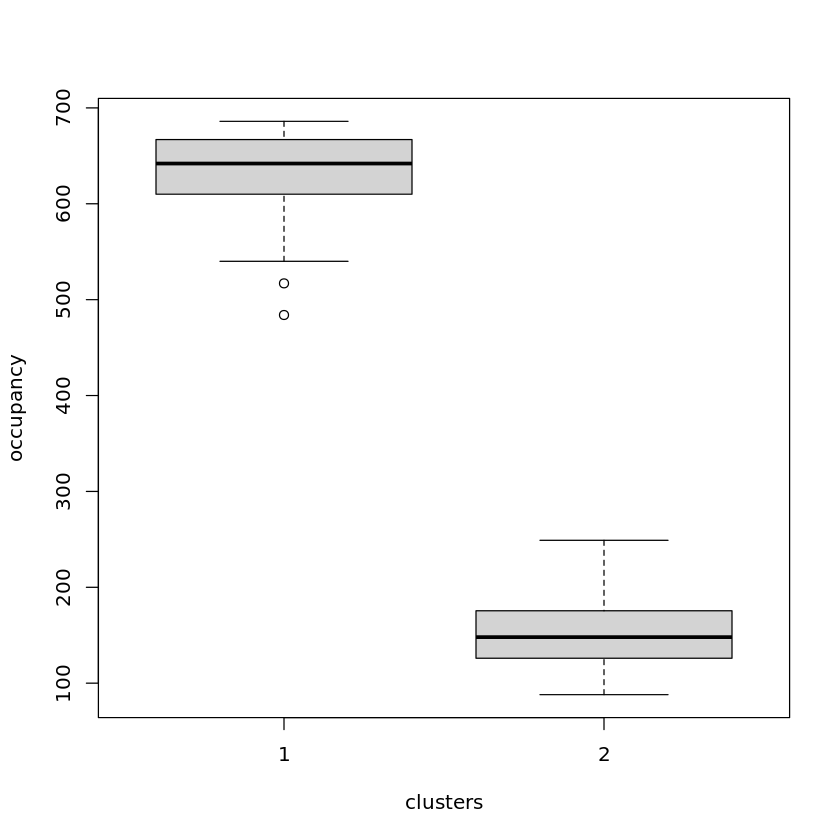

In [9]:
parking$clusters <- clusters
boxplot(occupancy ~ clusters, data = parking)

### (ii)

How do the weekdays and weekends differ? Does this confirm that this two-cluster solution is a good one? 

#### Solution <a class="tocSkip">

The occupancy on weekdays was far higher than that at weekends. This two-cluster solution is a very good one as there is no overlap at all between the two groups. 